In [ ]:
import pandas as pd
import numdifftools as nd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve,RocCurveDisplay
import autograd
from modules.ew import *

ModuleNotFoundError: No module named 'modules.ew'; 'modules' is not a package

In [ ]:
pip install modules.ew

ERROR: Could not find a version that satisfies the requirement modules.ew (from versions: none)
ERROR: No matching distribution found for modules.ew


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def validate(xtrain,ytrain,xtest,ytest, regressor=LinearRegression,degr=[1,10]):
    degress = list(range(degr[0], degr[1]))
    scores_test = []
    scores_train = []
    for i in degress:
        model = make_pipeline(PolynomialFeatures(degree=i),
                              regressor())
        model.fit(xtrain, ytrain)
        scores_test.append(model.score(xtest, ytest))
        scores_train.append(model.score(xtrain, ytrain))
    plt.plot(degress, scores_train, 'r-o')
    plt.plot(degress, scores_test, 'b-o')
    plt.legend(['Train', 'Test'])

# <font color = 'red'> ЛР 5. Простейший линейный классификатор - логистическая регрессия. </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 30.09.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Логистическая регрессия.  </font>

**Логистическая регрессия** - модель машинного обучения для линейной классификации данных. Основная идея состоит в вычислении вероятности попадания объекта в один из двух классов(в случае бинарной классификации) и последующей классификации этого объекта с помощью порога вероятности.

Общий алгоритм можно описать так.

1. Вычисляем зачение функции-регрессора для заданной функции $reg = \overline{w}^{T}\overline{x}$.
2. Вычисляем вероятность попадания в класс "1"  $p_{1} = \frac{1}{1+e^{-reg}}$.
3. Классифицируем объект в класс "1" в случае если $p_{1}>0.5$ (хотя порог можно взять другим) и в класс "0" в противоположном случае.

Подробнее изучить можно в конспекте лекции и по [ссылке](https://habr.com/ru/articles/485872/).

1.0
[[ 13.36636638 -13.29517375]]


array([-1.90307965])

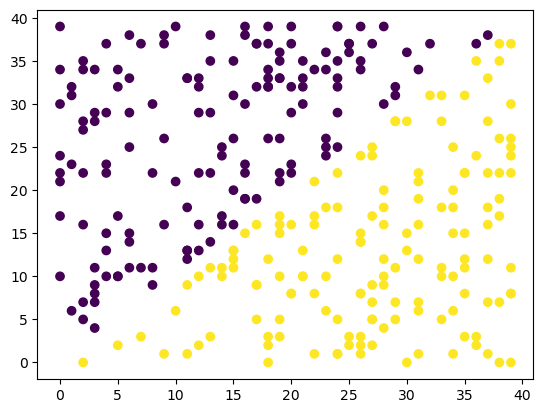

In [ ]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty='none')
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
print((inner_preds == y_data).mean())

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственные методы для классификации данных методом логистической регрессии. Для минимизации функции потерь используйте градиентный спуск.
2. Протестируйте ваш метод на искуственных данных. Сравните с работой встроенной функции.
3. Графически изобразите результаты классификации. Изобразите разделяющую гиперплоскость или кривую.
4. Попробуйте подобрать данные, которые станут проблемой (покажут низкое качество на валидации) для описанной модели.

In [ ]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def predict(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    preds = predict(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

x = X_data
y = y_data

training_gradient_fun = grad(training_loss)

weights = np.zeros_like(x[0],dtype=float)
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.04

print("Trained loss:", training_loss(weights))

Initial loss: 205.1715654457438
Trained loss: 1.173662788279633e-05


In [50]:
class LogRegression:
  def __init__(self, penalty=0):
    self.c = penalty


  def fit(self, x, y):
    self.x, self.y = x, y
    self.coef_ = np.random.rand(len(self.x[0]))
    self.gradient = lambda x,y: (y - self.sigmoid(x)) @ x

  def sigmoid(self, x):
    return 1 / (1 + np.exp(- self.coef_ @ x.T))

  def predict(self, x):
    return np.where(self.sigmoid(x) > 0.5, 1, 0)


  def mygradient(self, init_speed=2):
    prev_grad = np.random.rand(self.x.shape[1])

    prev_grad = prev_grad / np.sqrt((prev_grad @ prev_grad))

    speed = init_speed
    while speed > pow(10,-10):
      grad = self.gradient(x, y)
      grad = grad / np.sqrt((grad @ grad))

      cos = (prev_grad @ grad)

      speed *= 0.75*cos + 1.25

      self.coef_ -= speed * grad


  def statistics(self, x, y):
      out = self.predict(x)
      outputs = {'False': 0, 'True': 1}
      tp, tn, fp, fn = 0, 0, 0, 0
      for out_i, y_i in zip(out, y):
        if out_i == outputs['True']:
          if y_i == outputs['True']:
            tp += 1
          else:
            fp += 1
        else:
          if y_i == outputs['True']:
            fn += 1
          else:
            tn += 1
      return {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}



In [51]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [52]:
x,y = make_classification()
lrg = LogRegression()
lrg.fit(x,y)

In [53]:
lrg.coef_

array([0.1634018 , 0.08174904, 0.20447299, 0.25937603, 0.146239  ,
       0.94376766, 0.29954709, 0.4770758 , 0.8546488 , 0.58390645,
       0.98287489, 0.23298058, 0.4670329 , 0.12755684, 0.94555041,
       0.90202258, 0.57371513, 0.3721427 , 0.05290692, 0.60919333])

In [54]:
lrg.statistics(x,y)

{'TP': 25, 'TN': 27, 'FP': 22, 'FN': 26}

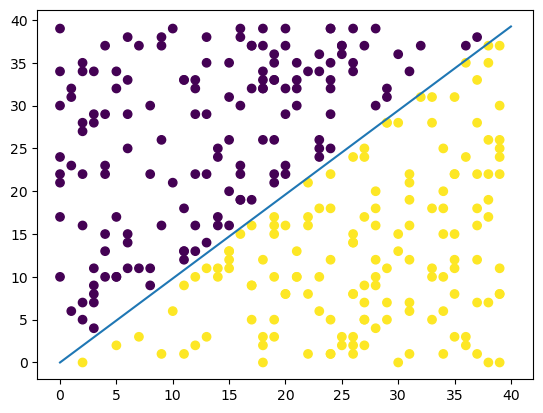

In [ ]:
plt.scatter(X_data[:,0],X_data[:,1],c = y_data);
xx = np.linspace(0,40,1000)
yy = -weights[0]/weights[1]*xx
plt.plot(xx,yy)

<font color = 'red' size = 5>Задание 2 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода логистической регрессии из встроенной библиотеки.
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Используйте регуляризацию, где необходимо. Определите оптимальный коэффициент регуляризации.
6. Оцените качество модели с помощью ROC-кривых.

[ROC](https://loginom.ru/blog/logistic-regression-roc-auc)


##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn".
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные.

#####  3.3 Данные теста микрочипов

Используйте данные из файла microchip_tests.txt для предсказания брака микрочипов. Предварительно изучите и подготовьте данные.

#####  3.4 Данные теста микрочипов

Используйте данные [о прогнозе болезней сердца](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression). Предварительно изучите и подготовьте данные.


## telecom

In [ ]:
df = pd.read_csv('datasets/telecom.csv')

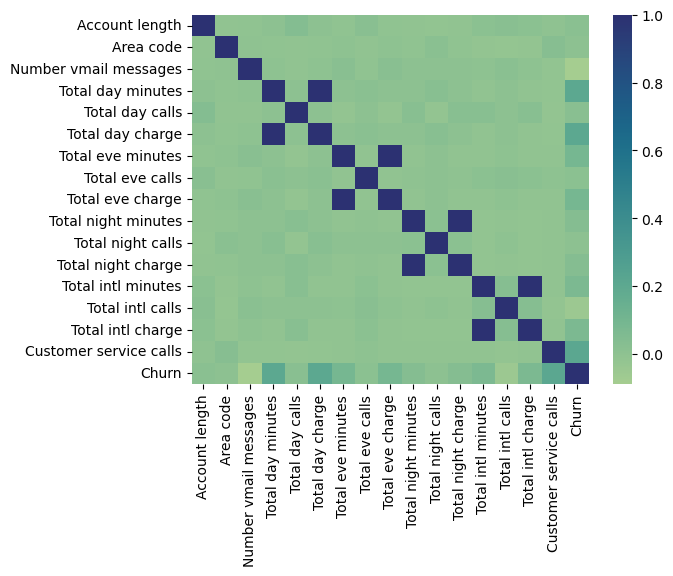

In [ ]:
corr = df.drop(columns=["State","International plan","Voice mail plan"]).dropna().corr()
sns.heatmap(corr,cmap="crest");

In [ ]:
data = df.drop(columns=["Area code","State","Total day charge","Total eve charge","Total night charge","Total intl charge"])

In [ ]:
data = pd.get_dummies(data,columns=['International plan',"Voice mail plan"]).dropna()

In [ ]:
X = data.drop(columns = ['Churn']).values
y = data['Churn'].values

In [ ]:
(xtrain,ytrain),(xtest,ytest) = divide_dataset(X,y,0.8)

In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
model.coef_
model.score(xtest,ytest)

0.8528528528528528

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(xtrain, ytrain)
model.coef_
model.score(xtest,ytest)

0.8573573573573574

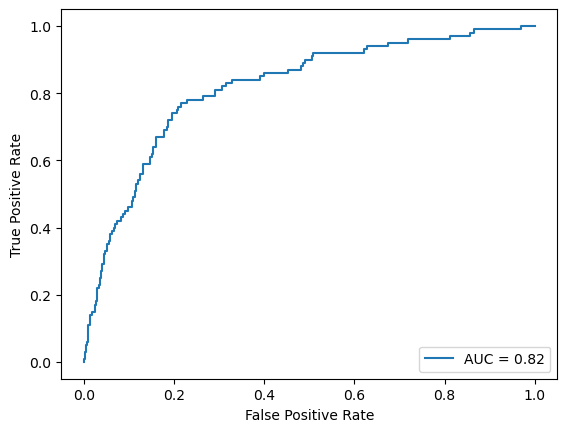

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest,model.predict_proba(xtest)[::,1])
roc_auc = roc_auc_score(ytest,model.predict_proba(xtest)[::,1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

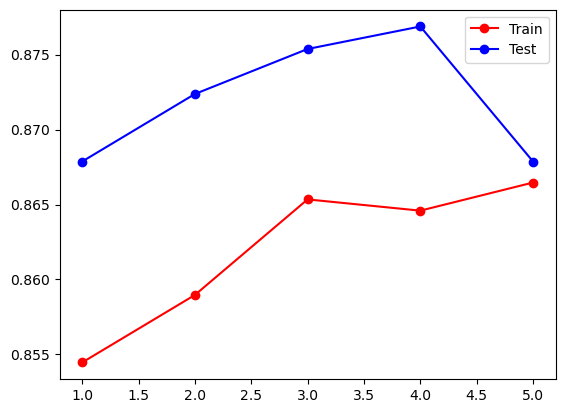

In [ ]:
validate(xtrain,ytrain,xtest,ytest,regressor=LogisticRegression,degr=[1,6])

In [ ]:
reg = PolynomialFeatures(degree=4)
xtrain4 = reg.fit_transform(xtrain)
xtest4 = reg.fit_transform(xtest)

In [ ]:
model = LogisticRegression()
model.fit(xtrain4, ytrain)
model.coef_
model.score(xtest4,ytest)

0.8648648648648649

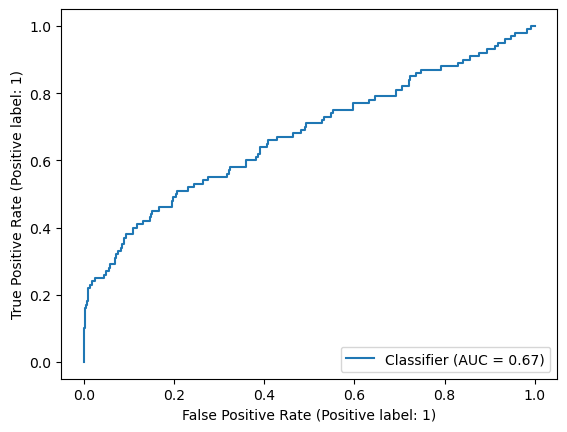

In [ ]:
RocCurveDisplay.from_predictions(ytest,model.predict_proba(xtest4)[::,1])

## diabetes

In [ ]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


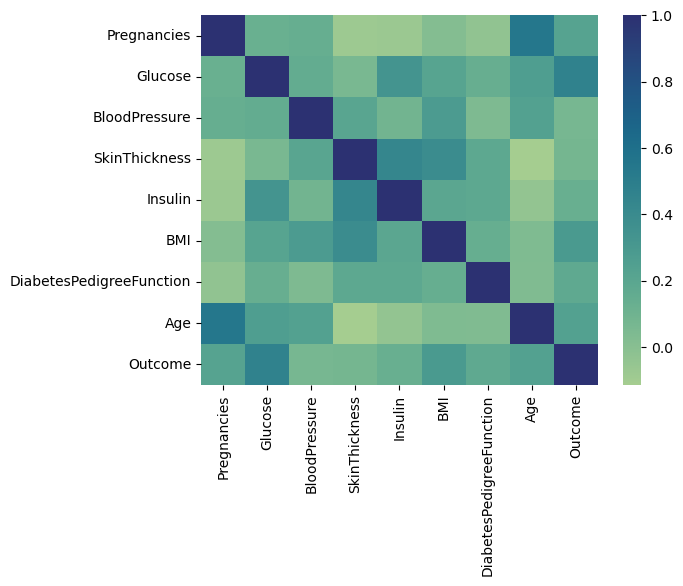

In [ ]:
corr = df.dropna().corr()
sns.heatmap(corr,cmap="crest");

In [ ]:
X = df.drop(columns = ['Outcome']).values
y = df['Outcome'].values
(xtrain,ytrain),(xtest,ytest) = divide_dataset(X,y,0.8)

In [ ]:
model = LogisticRegression(penalty='none')
model.fit(xtrain, ytrain)
print(model.coef_)
model.score(xtest,ytest)

[[ 0.12217633  0.03613983 -0.01304417  0.00075016 -0.00104316  0.10031349
   0.37694583  0.01329981]]


0.7712418300653595

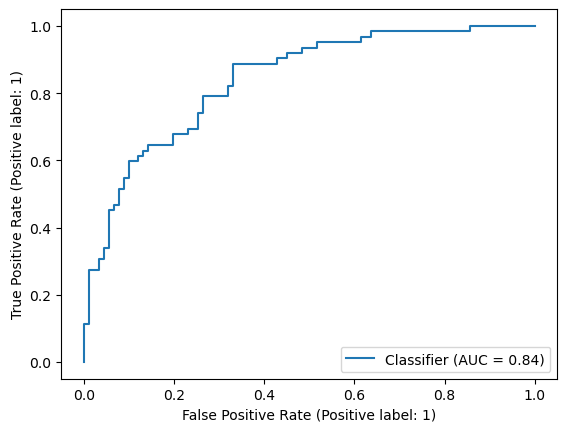

In [ ]:
RocCurveDisplay.from_predictions(ytest,model.predict_proba(xtest)[::,1])

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(xtrain, ytrain)
print(model.coef_)
model.score(xtest,ytest)

[[ 1.19155202e-01  2.72989520e-02 -1.68966133e-02  1.31092261e-04
  -3.98891003e-04  5.95571663e-02  4.16887184e-01  2.81764436e-03]]


0.7647058823529411

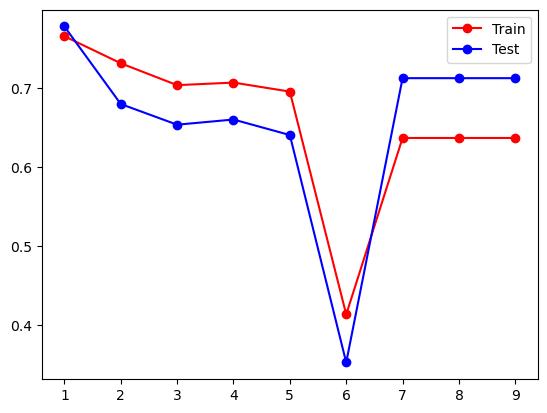

In [ ]:
validate(xtrain,ytrain,xtest,ytest,regressor=LogisticRegression)

In [ ]:
reg = PolynomialFeatures(degree=5)
xtrain5 = reg.fit_transform(xtrain)
xtest5 = reg.fit_transform(xtest)

In [ ]:
model = LogisticRegression(penalty='none')
model.fit(xtrain5, ytrain)
print(model.coef_)
model.score(xtest5,ytest)

[[-1.02277598e-20 -1.97715018e-20 -9.38671923e-19 ... -9.75508046e-17
  -7.92364811e-15 -1.10407666e-12]]


0.7058823529411765

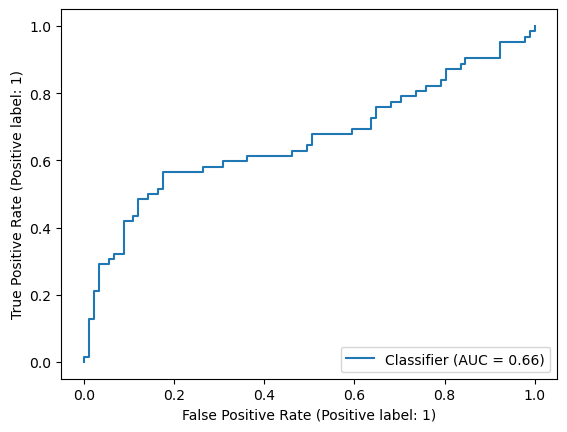

In [ ]:
RocCurveDisplay.from_predictions(ytest,model.predict_proba(xtest5)[::,1])

## microchips

In [ ]:
df = pd.read_csv("datasets/microchip_tests.txt")
df.head()

,x1,x2,outcome
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
X = df.dropna().drop(columns = ["outcome"]).values
y = df.dropna()["outcome"].values
(xtrain,ytrain),(xtest,ytest) = divide_dataset(X,y,0.8)

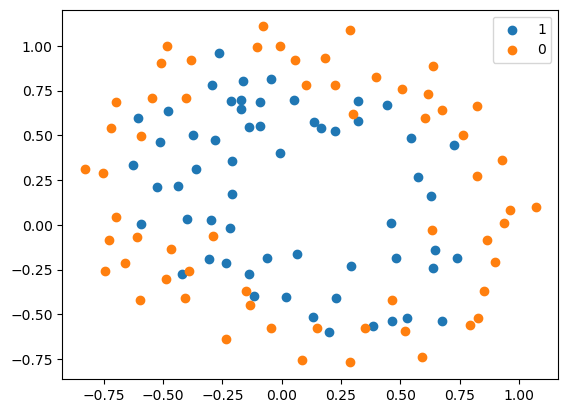

In [ ]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="0")
plt.legend();

In [ ]:
model = LogisticRegression(fit_intercept=False,penalty='none')
model.fit(xtrain, ytrain)
print(model.coef_)
model.score(xtest,ytest)

[[-0.19723938  0.09728655]]


0.4782608695652174

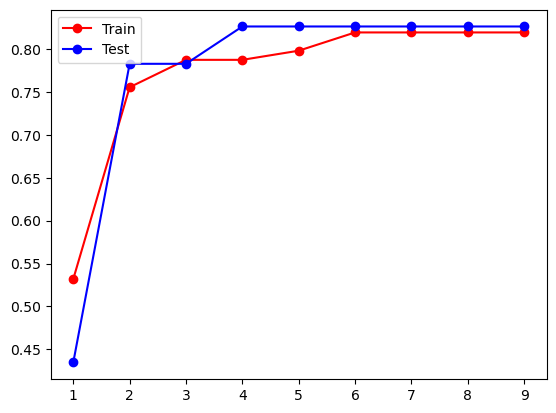

In [ ]:
validate(xtrain,ytrain,xtest,ytest,regressor=LogisticRegression)

In [ ]:
reg = PolynomialFeatures(degree=7)
xtrain7 = reg.fit_transform(xtrain)
xtest7 = reg.fit_transform(xtest)

In [ ]:
model = LogisticRegression(fit_intercept=False,penalty='none')
model.fit(xtrain7, ytrain)
print(model.coef_)
model.score(xtest7,ytest)

[[  6.09598093  13.21109515  26.88132406  13.17349302  19.71941565
   35.5791819  -22.87256915  35.86549911   8.09296681 -52.99164144
  -21.39130681 -22.40338902 -61.20193919 -16.66589684 -91.91483452
   17.2692533  -44.57901063  46.35118759 -92.48771898 -27.73002955
   45.0628584  -68.57106264 -38.73454142 -34.75963996  33.30197706
  -65.82982852 -75.09511058 -25.56543873   6.78481923 -19.38208895
    8.28237832 -57.31497752  44.63580614 -51.47739027 -92.93670473
   35.12841911]]


0.7391304347826086

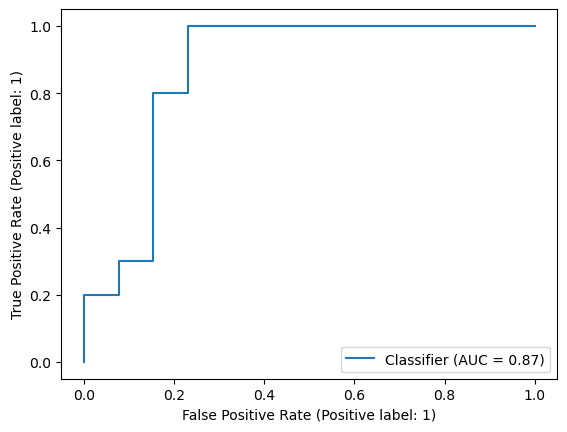

In [ ]:
RocCurveDisplay.from_predictions(ytest,model.predict_proba(xtest7)[::,1])

## heart desease

In [ ]:
df = pd.read_csv("datasets/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data =pd.get_dummies(df,columns=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']).dropna()

In [ ]:
X = data.drop(columns=["TenYearCHD"]).values
y = data["TenYearCHD"].values
(xtrain,ytrain),(xtest,ytest) = divide_dataset(X,y,0.8)

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(xtrain, ytrain)
print(model.coef_)
model.score(xtest,ytest)

[[ 0.05499886  0.0197788   0.00269177  0.01481477 -0.00518566 -0.00315674
  -0.00238033  0.00608391 -1.16216631 -0.57315675  0.0432768  -0.14058592
  -0.30441832 -0.09178385 -0.88007908 -0.85524398 -0.53912704 -0.42194746
  -1.30299058 -0.43233249 -1.01252007 -0.72280299 -0.93370982 -0.80161324]]


0.8629776021080369

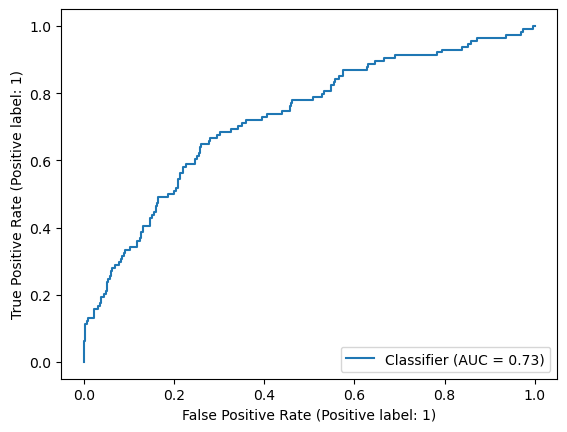

In [ ]:
RocCurveDisplay.from_predictions(ytest,model.predict_proba(xtest)[::,1])

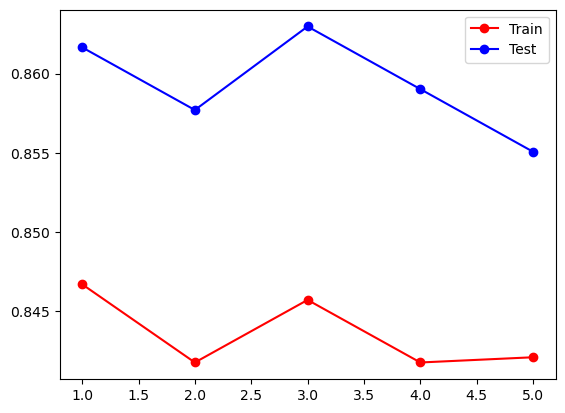

In [ ]:
validate(xtrain,ytrain,xtest,ytest,regressor=LogisticRegression,degr=[1,6])

In [ ]:
reg = PolynomialFeatures(degree=3)
xtrain3 = reg.fit_transform(xtrain)
xtest3 = reg.fit_transform(xtest)

In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(xtrain3, ytrain)
print(model.coef_)
model.score(xtest3,ytest)

[[-3.52432228e-09 -9.13032620e-08 -3.87997081e-08 ...  0.00000000e+00
   0.00000000e+00 -4.85611610e-10]]


0.8405797101449275

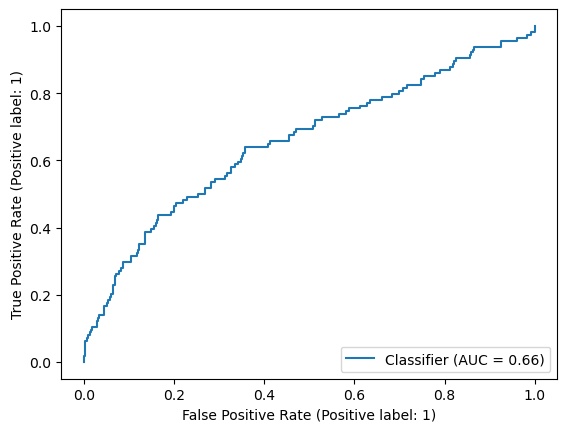

In [ ]:
RocCurveDisplay.from_predictions(ytest,model.predict_proba(xtest3)[::,1])